In [1]:
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.windows import Window
from rasterio.plot import * 
from rasterio.mask import * 
from matplotlib import pyplot
import numpy as np
from shapely.geometry import Point
from shapely.geometry import box
import requests, json
import pickle 

from time import sleep

import contextily as ctx
import osmnx as ox

In [2]:
bounds_list=[]
ind_bounds_list=[]

In [4]:
bounds=gpd.read_file("./data/Regions.geojson")

In [5]:
bounds.head()

ADM1_EN            ADM0_EN  \
0                                 Papua          Indonesia   
1                            Jawa Timur          Indonesia   
2  Autonomous Region in Muslim Mindanao  Philippines (the)   
3               National Capital Region  Philippines (the)   

                                            geometry  
0  MULTIPOLYGON (((138.92583 -8.32361, 138.92639 ...  
1  MULTIPOLYGON (((114.02917 -8.64806, 114.02917 ...  
2  MULTIPOLYGON (((119.46876 4.59360, 119.46881 4...  
3  POLYGON ((121.03842 14.78525, 121.03876 14.785...

In [8]:
bounds.loc[0,'geometry']

In [3]:
PH_bounds=gpd.read_file("./data/phl_admin_bounds/phl_admbnda_adm1_psa_namria_20200529.shp")
INDO_bounds=gpd.read_file("./data/IDN_adm/IDN_adm1.shp")

In [59]:
Papua=INDO_bounds.loc[INDO_bounds.NAME_1=="Papua",:]

In [60]:
JawaTimur=INDO_bounds.loc[INDO_bounds.NAME_1=="Jawa Timur",:]

In [61]:
ARMM=PH_bounds.loc[PH_bounds.ADM1_PCODE=="PH150000000",:]

In [62]:
NCR=PH_bounds.loc[PH_bounds.ADM1_PCODE=="PH130000000",:]

In [63]:
bounds_list.append(ARMM)
bounds_list.append(NCR)

In [64]:
combined_ph =pd.concat(bounds_list).reset_index(drop=True)

In [65]:
ind_bounds_list.append(Papua)
ind_bounds_list.append(JawaTimur)

In [66]:
combined_in=pd.concat(ind_bounds_list).reset_index(drop=True)

In [67]:
combined_in.head()

ID_0  ISO     NAME_0  ID_1      NAME_1    TYPE_1 ENGTYPE_1 NL_NAME_1  \
0   106  IDN  Indonesia    24       Papua  Propinsi  Province      None   
1   106  IDN  Indonesia    12  Jawa Timur  Propinsi  Province      None   

                                           VARNAME_1  \
0  New Guinea|Yos Sudarso or Frederick Hendrik|Wa...   
1                                              Jatim   

                                            geometry  
0  MULTIPOLYGON (((138.92583 -8.32361, 138.92639 ...  
1  MULTIPOLYGON (((114.02917 -8.64806, 114.02917 ...

In [71]:
combined_in=combined_in[["NAME_0", "NAME_1", "geometry"]]

In [15]:
combined=combined[["ADM1_EN","ADM0_EN","geometry"]]

In [72]:
ult_comb=pd.concat([combined_in,combined]).reset_index(drop=True)

In [73]:
ult_comb.head()

NAME_0      NAME_1                                           geometry  \
0  Indonesia       Papua  MULTIPOLYGON (((138.92583 -8.32361, 138.92639 ...   
1  Indonesia  Jawa Timur  MULTIPOLYGON (((114.02917 -8.64806, 114.02917 ...   
2        NaN         NaN  MULTIPOLYGON (((119.46876 4.59360, 119.46881 4...   
3        NaN         NaN  POLYGON ((121.03842 14.78525, 121.03876 14.785...   

                                ADM1_EN            ADM0_EN  
0                                   NaN                NaN  
1                                   NaN                NaN  
2  Autonomous Region in Muslim Mindanao  Philippines (the)  
3               National Capital Region  Philippines (the)

In [74]:
ult_comb.loc[0,'ADM1_EN']="Papua"
ult_comb.loc[0, 'ADM0_EN']="Indonesia"
ult_comb.loc[1,'ADM1_EN']="Jawa Timur"
ult_comb.loc[1, 'ADM0_EN']="Indonesia"

In [76]:
ult_comb=ult_comb[["geometry","ADM1_EN","ADM0_EN"]]
ult_comb.head()

geometry  \
0  MULTIPOLYGON (((138.92583 -8.32361, 138.92639 ...   
1  MULTIPOLYGON (((114.02917 -8.64806, 114.02917 ...   
2  MULTIPOLYGON (((119.46876 4.59360, 119.46881 4...   
3  POLYGON ((121.03842 14.78525, 121.03876 14.785...   

                                ADM1_EN            ADM0_EN  
0                                 Papua          Indonesia  
1                            Jawa Timur          Indonesia  
2  Autonomous Region in Muslim Mindanao  Philippines (the)  
3               National Capital Region  Philippines (the)

In [89]:
ult_comb.to_file("./data/Regions.geojson", driver="GeoJSON")

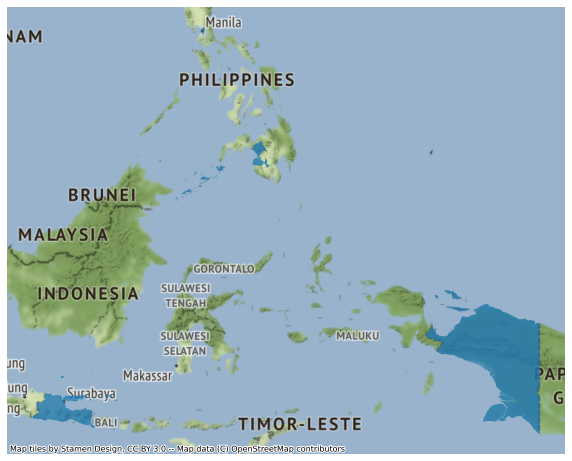

In [90]:
_plot_df(ult_comb)

In [2]:
def _plot_df(df, geo_col = 'geometry'):
    dfp = df.copy()
    dfp['geometry'] = dfp[geo_col]
    dfp = dfp.to_crs("EPSG:3857")
    ax = dfp.plot(figsize=(10, 10), alpha=0.8)
    ctx.add_basemap(ax)
    ax.set_axis_off()

